# **PS1**

<br>
**Part 1: Write a data section for your assigned data set**

<br>
*1. Describe how to access data, where it is stored, who curates it.
& 3. Describe how the data were collected.*

The dataset is about food inspections on more than 15000 food establishments all across Cit of Chicago from 2010 to now. All the data of food inspections are collected by staffs in the Food Potection Program under the Department of Public Health in Chicago using standardized procedures. The result of food inspections are stored in the database, which is updated on a weekly basis after being reviewed by State of Illinois Licensed Environmental Health Practitioner. The subset of this database can be found and downloaded directly via https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5/data. 

<br>
*2. Cite other key papers that have used this data.*

There are some other papers which have used this dataset:

 - Choucair, B., Bhatt, J., & Mansour, R. (2015). A bright future: innovation transforming public health in Chicago. Journal of Public Health Management and Practice, 21(Suppl 1), S49.
 
 - McBride, K., Aavik, G., Kalvet, T., & Krimmer, R. (2018, January). Co-creating an Open Government Data Driven Public Service: The Case of Chicago’s Food Inspection Forecasting Model. In Proceedings of the 51st Hawaii International Conference on System Sciences

The first paper discusses how the government of Chicago, especailly the public health deparement, utilized big data tool to help make better decision. And the second paper builds a forecasting model based on the dataset, contributing to improve public service in the future.

<br>
*4. Include a table that gives descriptive statistics for at least 8 key variables*

Some key variables in the dataset are listed as below:

| Vairable Name | Variable Type | Variable function |
| :--- | :----: | ----: |
| DBA | str | Legal name |
| License number | int | A unique number assigned to the establishment |
| Type of facility | str | Category, e.g. bakery, candy store, coffee shop...|
| Risk category of facility | int | Category, risk of affecting public’s health, 1 - highest, 3- lowest|
| Inspection date | date | The date the inspection occurred|
| Inspection type | str | Category, canvass, consultation, complaint, license, suspect food poisoning, task-force inspection |
| Inspection results | str | Category, pass, pass with conditions, fail |
| Violations | str | Category, details of findings that caused the violation |

Two important variables might need extra explanation here:
 - Risk category of facility: this risk is relevant to the frequency of inspection, when risk is 1,  establishments will be inspected most frequently, and when risk is 3, establishments will be inspected least frequently.
 - Inspection results: pass means no severe violations were discovered; pass with conditions means serious violations were found but correction was completed; fail means critical violations were found without correction.
 
<br>
*5. Include at least one key visualization of the data that exhibits an interesting characteristic.*

In [2]:
import pandas as pd
data = pd.read_csv('C:/Users/liaoa/Desktop/MACS30200/PS1/Food_Inspections.csv')

In [5]:
data.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [47]:
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2160035,MR.POLLO,MR.POLLO,2542969.0,Restaurant,Risk 1 (High),5222 W DIVERSEY AVE,CHICAGO,IL,60639.0,04/13/2018,Canvass,Pass,NaN,41.931498,-87.757382,"(41.93149804730922, -87.75738202142212)"
1,2160034,DOMINO'S,DOMINO'S,2563550.0,Restaurant,Risk 2 (Medium),3918-3920 N CICERO AVE,CHICAGO,IL,60641.0,04/13/2018,Complaint,Pass w/ Conditions,40. REFRIGERATION AND METAL STEM THERMOMETERS ...,41.952136,-87.747429,"(41.95213643037515, -87.74742887301954)"
2,2160017,Lutheran Church Missouri Synod,St. John Lutheran Church and School,1981887.0,School,Risk 1 (High),4939 W Montrose AVE,CHICAGO,IL,60641.0,04/13/2018,Canvass,Pass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.960565,-87.751517,"(41.96056547492984, -87.75151742057427)"
3,2160019,ST. PAUL EVANGELICAL LUTHERAN SCHOOL,ST. PAUL EVANGELICAL LUTHERAN SCHOOL,3624741.0,School,Risk 2 (Medium),7621 S DORCHESTER AVE,CHICAGO,IL,60619.0,04/13/2018,Canvass,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.756247,-87.590593,"(41.756247495462446, -87.59059253531424)"
4,2160016,BUFFET LOS AMIGOS RESTAURANT INC,BUFFET LOS AMIGOS RESTAURANT INC,2583903.0,Restaurant,Risk 1 (High),5823 W FULLERTON AVE,CHICAGO,IL,60639.0,04/13/2018,License Re-Inspection,Pass,"11. ADEQUATE NUMBER, CONVENIENT, ACCESSIBLE, D...",41.923778,-87.771914,"(41.923777505298624, -87.77191442640833)"


In [8]:
data['Risk'].value_counts()

Risk 1 (High)      117586
Risk 2 (Medium)     34139
Risk 3 (Low)        15599
All                    22
Name: Risk, dtype: int64

In [11]:
data['Results'].value_counts()

Pass                    98082
Fail                    32441
Pass w/ Conditions      15854
Out of Business         14880
No Entry                 4967
Not Ready                1127
Business Not Located       61
Name: Results, dtype: int64

In [35]:
data.groupby(['Risk', 'Results']).size()

Risk             Results             
All              Business Not Located        1
                 Fail                        5
                 No Entry                    3
                 Not Ready                  10
                 Out of Business             3
Risk 1 (High)    Business Not Located       27
                 Fail                    22389
                 No Entry                 3899
                 Not Ready                 578
                 Out of Business          7221
                 Pass                    71428
                 Pass w/ Conditions      12044
Risk 2 (Medium)  Business Not Located       15
                 Fail                     6610
                 No Entry                  826
                 Not Ready                 310
                 Out of Business          3421
                 Pass                    19534
                 Pass w/ Conditions       3423
Risk 3 (Low)     Business Not Located       11
                 Fail 

As we can see from the results above, there are suprisingly high number of food establishments getting the highest risk. However, we can also find out that most food establishments have pass as inspection results. It seems that things are not as bad as we imagined at first glance.

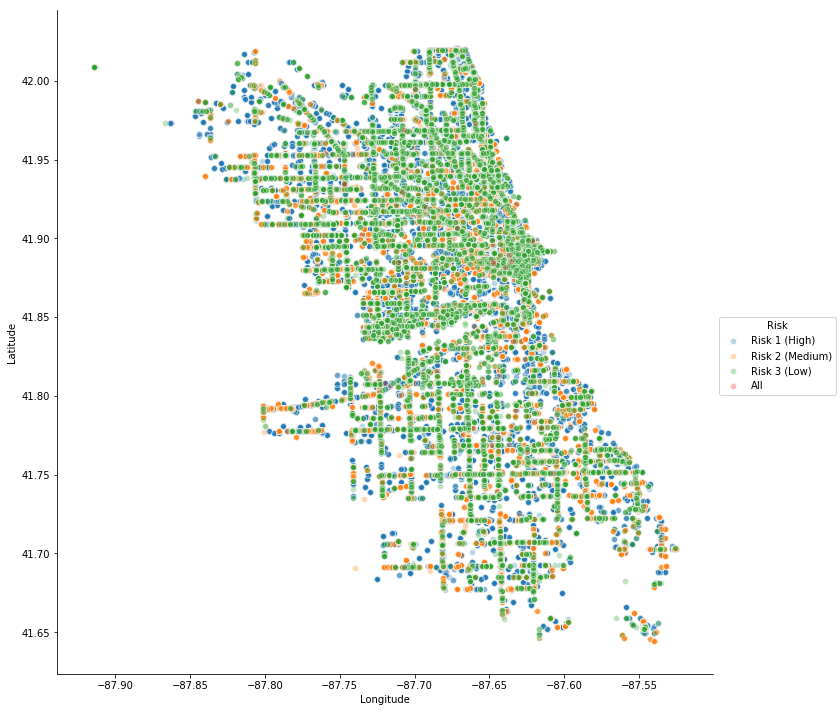

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(x_vars = ['Longitude'] , y_vars = ['Latitude'], data = data, hue = 'Risk', size = 10,  
                 plot_kws = {"alpha":0.3})

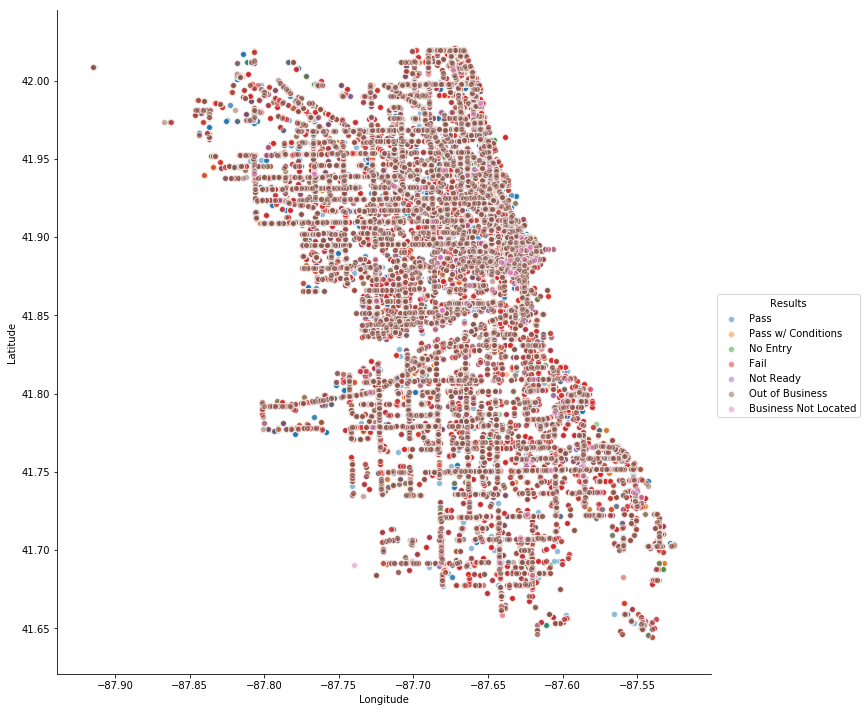

In [30]:
sns.pairplot(x_vars = ['Longitude'] , y_vars = ['Latitude'], data = data, hue = 'Results', size = 10,  
                 plot_kws = {"alpha":0.5})

From the visulization above, we can easily discover that there are straight lines, both vertical and horizontal in the map. If we are familiar with the map of Chicago, we are able to immediately tell that most food establishments are distributed along main roads. From the standard of risk and results, food establishments with different categories seem to distribute evenly.

<br>
*6. Show at least one conditional (slice) description of the data.*

In [37]:
data_use = data[data['Inspection Type'] == 'Canvass']

In [43]:
data_use['Risk'].value_counts()

Risk 1 (High)      65614
Risk 2 (Medium)    16440
Risk 3 (Low)        6911
All                    4
Name: Risk, dtype: int64

In [44]:
data_use['Results'].value_counts()

Pass                    45754
Fail                    15056
Out of Business         14637
Pass w/ Conditions       9729
No Entry                 3726
Not Ready                  41
Business Not Located       29
Name: Results, dtype: int64

In [45]:
data_use.groupby(['Risk', 'Results']).size()

Risk             Results             
All              No Entry                    1
                 Out of Business             3
Risk 1 (High)    Business Not Located       20
                 Fail                    11855
                 No Entry                 3109
                 Not Ready                  31
                 Out of Business          7076
                 Pass                    35737
                 Pass w/ Conditions       7786
Risk 2 (Medium)  Business Not Located        6
                 Fail                     2503
                 No Entry                  543
                 Not Ready                   9
                 Out of Business          3368
                 Pass                     8214
                 Pass w/ Conditions       1797
Risk 3 (Low)     Business Not Located        3
                 Fail                      698
                 No Entry                   73
                 Not Ready                   1
                 Out o

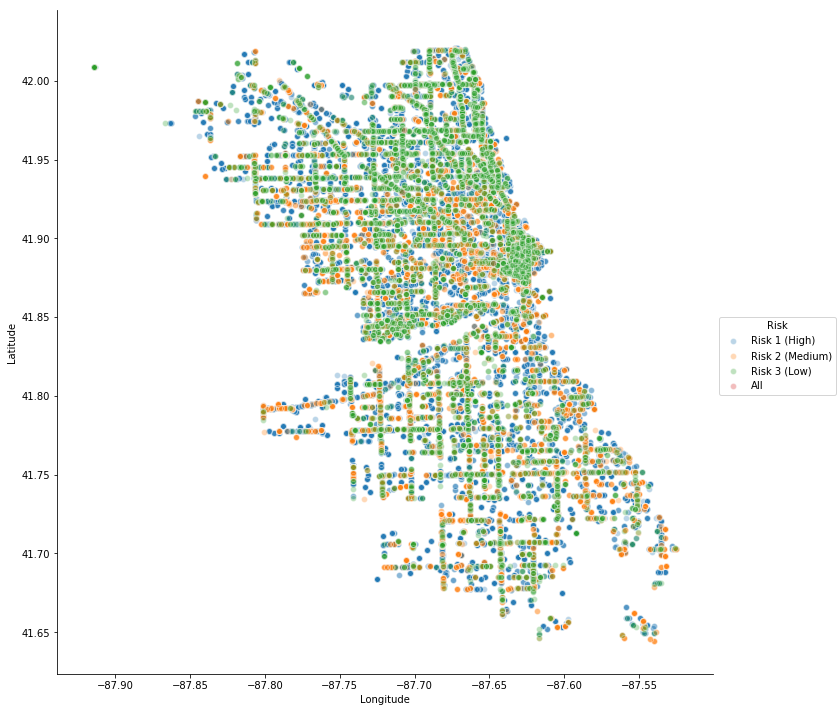

In [46]:
sns.pairplot(x_vars = ['Longitude'] , y_vars = ['Latitude'], data = data_use, hue = 'Risk', size = 10,  
                 plot_kws = {"alpha":0.3})

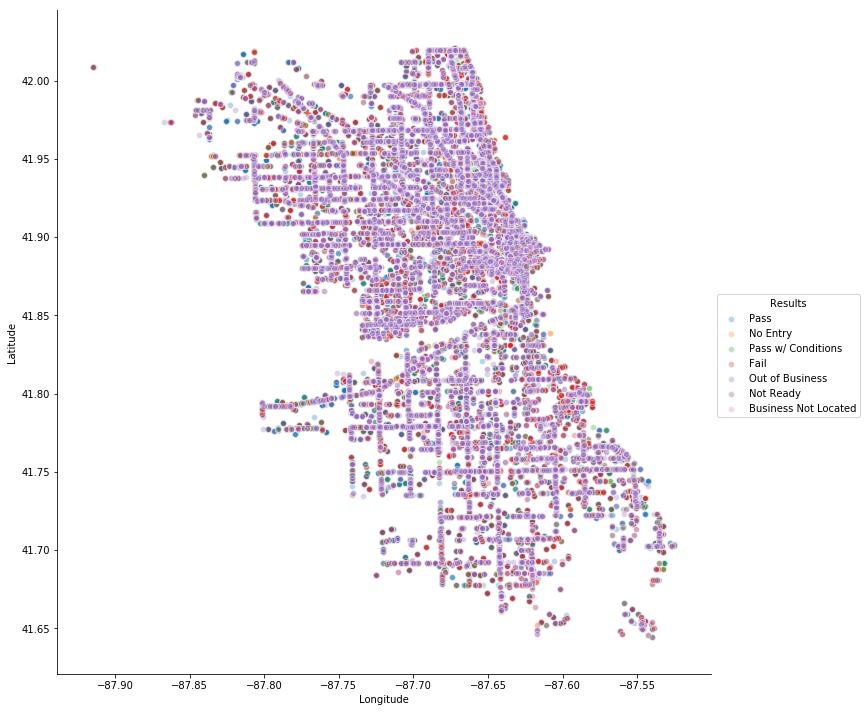

In [40]:
sns.pairplot(x_vars = ['Longitude'] , y_vars = ['Latitude'], data = data_use, hue = 'Results', size = 10,  
                 plot_kws = {"alpha":0.3})

I choose all inspection records with the inspection type is Canvass, the most common one. The groupby result looks much more reasonable right now - the food establishments with risk 1 have a higher percentage of receiving fail when compared to the whole dataset. Interestingly, when a food establishment get risk 3, it is highly likely that it is alreaday out of business, which is not the case when using the whole dataset.

### **Part 2: Critique a computational research paper**


#### **Paper**: 

Grimmer, J. (2016). Measuring Representational Style in the House: The Tea Party, Obama, and Legislators' Changing Expressed Priorities.


#### *1. State the research question of your assigned paper.*
This Grimmer paper focus on how represenatation works in American politics. Specifically, the research question is: how legislators identify their representation styles, and how this identification changes with different electoral pressure and party control of Congress from year to year. In his own words, the author shows "how members of the Republican party shift their attention after Barack Obama's election toward criticism and away from claiming credit for expenditures in their district".


#### *2. What data did the paper use?*
The paper uses the text data from Congressional text, that is, 170,000 White House press releases  ranging from 2005 to 2010, containing each press release from each White House office.


#### *3. What theory did the paper reference in order to interpret the data?*
The author uses the Topic Model theory as the foundation of this paper. 

He states that this unsupervised learning tool is widely applied in analyzing large text data, and it can discover topics quickly in the large text documents and measure how attention to topics changes with documents, actors and time. The nature of hierarchical structure makes it easy to extend to include different features of documents, authors of the model, and time.

Here are three representative Topic Models and their features:

 - Structural Topic Model: based on a user provided set of characteristics;
 - Grimmer Topic Model: grouping legislators who have similar attention on topics; 
 - Pachinko Allocation Models: emphasis on the similar set of words.

The author also admits that choosing the optimal number of topics is hard. While using nonparametric priors can be problematic because of the underlying strong assumptions behind, he purposes a modified model similar to Pachinko Allocation which nests topics into different sets.

Based on these discussion, the author used the Blaydes, Grimmer and McQueen (2014) model and successfully clearifies the reasons why the Topic Model is ideal for his research question from the modelling and statistical aspect. 


#### *4. Was your assigned paper a descriptive study, an identification exercise, a numerical solution to system of equations study, or some combination of the three?*
This research is a combination of descriptive study and identification exercise. 

On the one hand, he extracts upper level topics from raw text and shows it to readers. As we can see from the results section, the author displays a detailed table of granular topics, coarse topics and corresponding percentage, and time validation diagrams during special political events period. No complicated statitics is computed; the author just shows us how the data looks like in different aspects, therefore, it is a descriptive study.

On the other hand, the author proposes a hypothesis and trys to identify the year-to-year relationship between represenatation style and politics environment. In other words, he uses data to support his thoughts, which is exactly the essence of identification study.


#### *5. What computational methods did this paper use to answer the research question? What was their result or answer to the question?*
To answer the research question, the author first represents each press release as a vector, and each element stands for the number of times a token w occurs in document j from legislator i. 

Based on these vectors, the author builds a modified two-layer hierarchy Topic Model to nest topics, and then used unsupervised learning tool to establish the link between granular topics and coarse topics. The model is powerful enough to detect granular topics, group coarse topics as well as estimate legislators' credit claiming propensity. The author uses time validation method and supervised learning methods to support the validty of this model.

The result is that, republican House members abandon credit claiming after Obama's election, while Democratic House members amplify their credit claiming. In particular, Republican House members criticize the Affordable Care Act, stimulus expenditures, and more generally the Obama administration. However, legislators also maintain largely the same style over the 6 years while responding to changing conditions in districts and oppositions. This research also shows that the computational tool is really useful when analyzing big text documents in American politics.

#### *6.Think of yourself as an academic referee. Give two suggestions to the author(s) of your assigned paper of things the authors might do to improve their results or strengthen their evidence for the answer to the question.*
This research cites too many of Grimmer's papers. While it's true that this paper is built on his previous work and it's great to stay self-consistent, citing himself so many times might weaken the persuasive power of his model and result. So my first suggestion is to add more citations from other researchers - others replicating his models, or other similar topic model papers.

Another advice is to make comparasion between models. Currently, we can only see one model presented in the paper, but I would like to learn more about how this model defeat other non-Topic Models. This comparasion can strongly support his model selection as well as conclusion.